In [1]:

from model import  MyAwesomeModel

import torch
import hydra
from omegaconf import OmegaConf
import logging
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
import pytorch_lightning as pl


log = logging.getLogger(__name__)




class AnimalDataset(Dataset):
    def __init__(self, labels, images):
        self.img_labels = labels
        self.img = images

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image =self.img[idx]
        image = transform_images(image)
        label = self.img_labels[idx]   
        return image, label


def transform_images(data):
    transform = transforms.Compose([transforms.Resize((128,128))])
    return transform(data)


dir = "C:\\Users\\Tobias\\Documents\\DTU\mlops_project\\mlops_project\\data\\processed\\"
#train_images = torch.load(dir + "train_images.pt")
#train_labels = torch.load(dir + "train_labels.pt")
test_images = torch.load(dir + "test_images.pt")
test_labels = torch.load(dir + "test_labels.pt")


#train_dataset = AnimalDataset(train_labels,train_images)
test_dataset  = AnimalDataset(test_labels,test_images)

#train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=10)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle= False, num_workers=10)



label_dict =  {'0': 'dog', "1": "horse", "2": "elephant", "3": "butterfly", "4": "chicken", "5": "cat", "6": "cow", "7": "sheep", "8": "squirrel","9":"spider"}



In [2]:
images, labels = next(iter(test_dataloader)) 
import torchvision

import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{label_dict[labels[j]]:5s}' for j in range(4)))

In [4]:
categories = {'cane': 'dog', "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel","ragno":"spider"}
dataset = []
animals = ["dog", "horse","elephant", "butterfly",  "chicken",  "cat", "cow",  "sheep", "squirrel", "spider"]

import os
import cv2

images = []
labels = []
for category,translate in categories.items():
    path = "c:\\Users\\Tobias\\Documents\\DTU\\mlops_project\\mlops_project\\data\\raw\\" + category
    target = animals.index(translate)

    for img in os.listdir(path):
        img=cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(target)

c:\Users\Tobias\Documents\DTU\mlops_project\mlops_project\src\models
horse


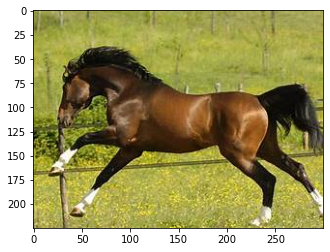

In [26]:

import matplotlib.pyplot as plt
label_dict =  {'0': 'dog', "1": "horse", "2": "elephant", "3": "butterfly", "4": "chicken", "5": "cat", "6": "cow", "7": "sheep", "8": "squirrel","9":"spider"}
index = 4863
print (os.getcwd())
print(label_dict[str(labels[index])])

plt.imshow(images[index])

In [27]:
dataset = {
        'images': images,
        'labels': labels,
    }
from sklearn.model_selection import train_test_split
x = dataset["images"]
y = dataset["labels"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify= y)

c:\Users\Tobias\Documents\DTU\mlops_project\mlops_project\src\models
spider


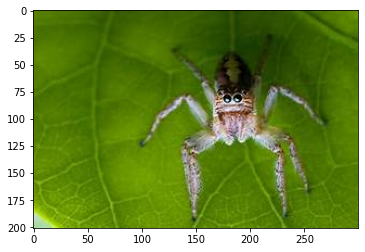

In [76]:
import matplotlib.pyplot as plt
label_dict =  {'0': 'dog', "1": "horse", "2": "elephant", "3": "butterfly", "4": "chicken", "5": "cat", "6": "cow", "7": "sheep", "8": "squirrel","9":"spider"}
import random
index = random.randint(0,5000)
print (os.getcwd())
print(label_dict[str(y_test[index])])

plt.imshow(x_test[index])